# Exercício Aula 19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

sns.set()
flatui = ["#3498db", "#e74c3c", "#9b59b6", "#95a5a6", "#2ecc71", "#34495e"]
sns.set_palette(flatui)

%matplotlib inline

Carregamento do dataset:

In [2]:
df = pd.read_csv("data/gender.csv")
print(df)

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


## EDA

Correlação entre os atributos (person correlation).

In [3]:
print(df.corr())

          Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000


Distribuição dos atributos.

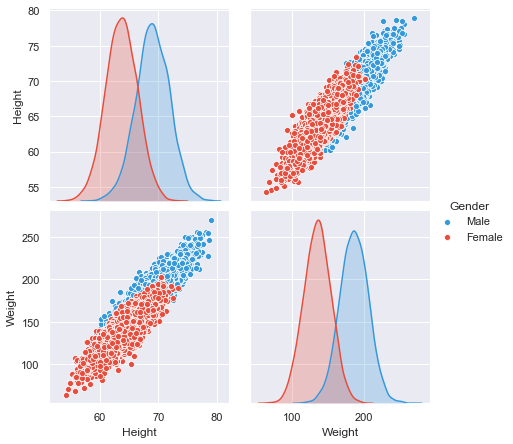

In [4]:
sns.pairplot(df, hue="Gender", height=3);

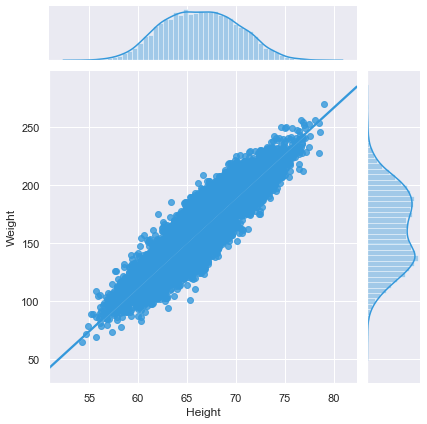

In [5]:
g = sns.jointplot(
    "Height", "Weight", data=df[["Height", "Weight"]],
    kind="reg", truncate=False, height=6
)
plt.show()

Vamos codificar o gênero como 0 ou 1 e realizar um split dos dados, para treino e teste.

In [6]:
le = LabelEncoder()

X = df[["Height", "Weight"]].to_numpy()
y = le.fit_transform(df["Gender"].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Amostra para treinamento:", len(X_train))
print("Amostra para testes     :", len(X_test))
print(f"Converter valores {np.unique(df['Gender'].to_numpy())} para {np.unique(y)}: ")

Amostra para treinamento: 7000
Amostra para testes     : 3000
Converter valores ['Female' 'Male'] para [0 1]: 


## Logistic Regression

In [7]:
clf = LogisticRegression(random_state=0, max_iter=500, n_jobs=-1).fit(X_train, y_train)
print("Usados os valores padrão do scikit-learn exceto:")
print(clf)

Usados os valores padrão do scikit-learn exceto:
LogisticRegression(max_iter=500, n_jobs=-1, random_state=0)


              precision    recall  f1-score   support

      Female       0.91      0.93      0.92      1489
        Male       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



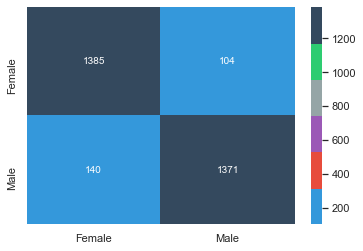

In [8]:
yh = clf.predict(X_test)

print(classification_report(y_test, yh, target_names=le.classes_))

cm = confusion_matrix(y_test, yh)
sns.heatmap(
    cm, annot=True, fmt="d", 
    xticklabels=le.classes_, yticklabels=le.classes_, 
    cmap=flatui
)
plt.show()

## Support Vector Machine

In [9]:
clf = SVC(C=5, random_state=0).fit(X_train, y_train)
print("Usados os valores padrão do scikit-learn exceto:")
print(clf)

Usados os valores padrão do scikit-learn exceto:
SVC(C=5, random_state=0)


              precision    recall  f1-score   support

      Female       0.91      0.93      0.92      1489
        Male       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



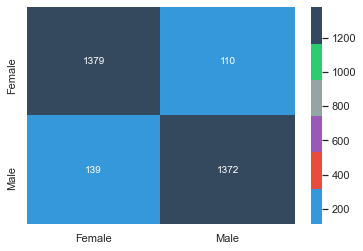

In [10]:
yh = clf.predict(X_test)

print(classification_report(y_test, yh, target_names=le.classes_))

cm = confusion_matrix(y_test, yh)
sns.heatmap(
    cm, annot=True, fmt="d", 
    xticklabels=le.classes_, yticklabels=le.classes_, 
    cmap=flatui
)
plt.show()